# Random Forest Classifier and Regression

Random Forest has a variety of application such as 
- Recommendation engines, 
- Image classifiaction and feature selection.
- It can be used to classify loayal loan applicants, idetyfy fraudulent activity and predict deasese.
- It lies at the base of the Borula Algorithm which selects important features in a datasets

### How the Random Forest Algorithm Works

- Select random samples from a given dataset.
- Conduct a dicision tree for each sample and get predictin result from each decision tree
- Perform a vote for each predicted result 
- select the prediction result with the most votes as the final prediction

### Import Feature for Classification
Random forest uses gini importance or Mean Decrease in Impurity(MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decrease when you drop a variable. The larger th decrease , the more signature the variable is. Here, the mean decrease is a significant prameter  for variable selection. The Gini Index can describe the overall explanatory power of the variables.   

### Random Forest  Vs Decision Tree

- Random forest is a set of multiple decision trees.
- Deep decision trees may suffer from overfitting , but Random forest prevents overfitting by creating trees on randon subsets.
- Decision trees are computationally faster.
- Random forests is difficut to Interpret, while a decision tree is easily interpretable and can be converted to rules

### Part 1:  Random Forest as a Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
# convert into vectors

x = diabetes.data
y = diabetes.target

x.shape, y.shape

((442, 10), (442,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)

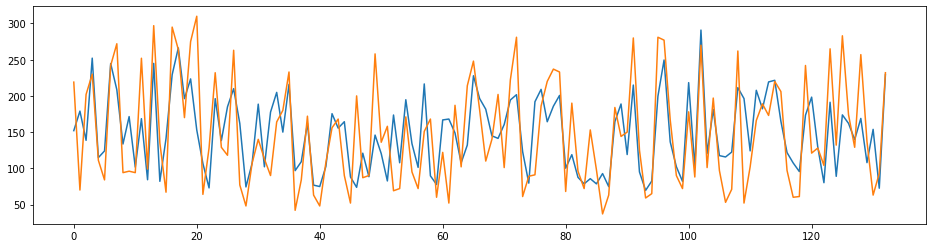

In [9]:
plt.figure(figsize=(16,4))
plt.plot(y_predict)
plt.plot(y_test)

In [10]:
np.sqrt(metrics.mean_squared_error(y_test, y_predict))

53.505825893179875

In [11]:
y_test.std()

73.47317715932746

## Random Forest as a Classifier with iris dataset

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
iris  = datasets.load_iris()

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
x = iris.data
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 1, stratify= y)

clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9777777777777777


-----Confusion Matrix-----


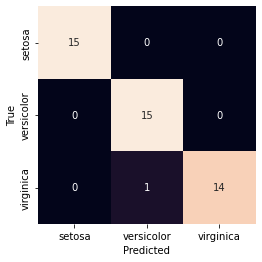

In [18]:
print("-----Confusion Matrix-----")
mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot= True, fmt = 'd', cbar = False, xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [20]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [21]:
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [22]:
clf.feature_importances_

array([0.1160593 , 0.03098375, 0.43034957, 0.42260737])

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']